<h1> Gaussian Regressor </h1>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import *
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import StandardScaler
import sklearn.datasets

In [68]:
# X, y = sklearn.datasets.make_regression(n_samples=100, n_features=1, noise=10)
X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

In [74]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10).fit(X, y)
mu, sigma = gp.predict(X, return_std=True) # doesn't return y_pred

/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/sklearn/gaussian_process/_gpr.py:479: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn(


/opt/homebrew/anaconda3/envs/aman/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:1988: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


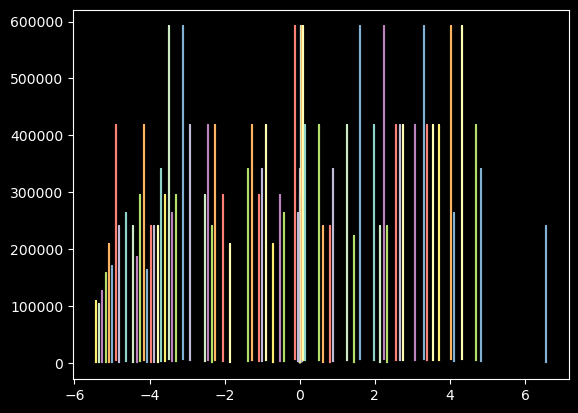

In [70]:
import scipy.stats as stats

# x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
# plt.plot(x, stats.norm.pdf(x, mu, sigma))
# plt.show()

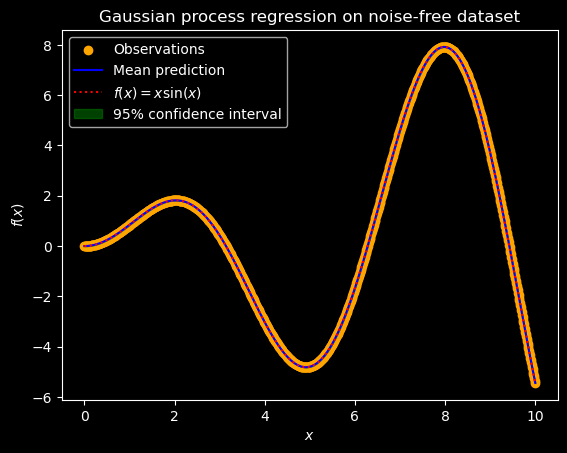

In [88]:

plt.scatter(X, y, label="Observations", color='orange')
plt.plot(X, mu, label="Mean prediction", color='b')
plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted", color='r')

plt.fill_between(
    X.ravel(),
    mu - 1.96 * sigma,
    mu + 1.96 * sigma,
    alpha=0.5,
    label=r"95% confidence interval",
    color='green'
)

plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

((80, 1), (80,))

<h1> Gaussian Classifier </h1>

In [166]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import accuracy_score, log_loss
X,y = sklearn.datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_pred = GaussianProcessClassifier().fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_pred)

0.9

/var/folders/_2/y461zwnj1zvg7rpcqwc9zm640000gn/T/ipykernel_78750/2229710608.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_test[:,0], y_pred,  cmap='viridis', s=100, edgecolors='k', linewidth=1, color=[1., alpha, alpha])
/var/folders/_2/y461zwnj1zvg7rpcqwc9zm640000gn/T/ipykernel_78750/2229710608.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_test[:,0], y_test , cmap='viridis', s=40, edgecolors='k', linewidth=1, color=[alpha, alpha, 1.])


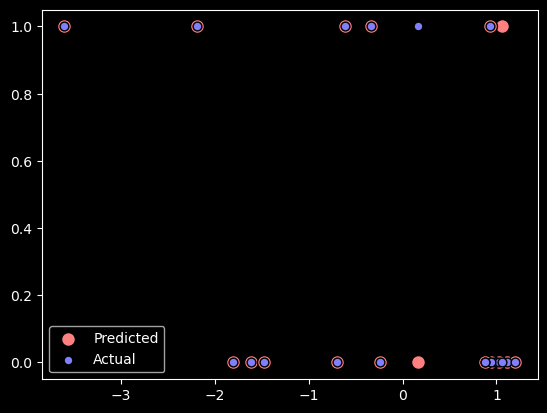

In [167]:

ax  = plt.gca()
alpha = 0.5
ax.scatter(X_test[:,0], y_pred,  cmap='viridis', s=100, edgecolors='k', linewidth=1, color=[1., alpha, alpha])
ax.scatter(X_test[:,0], y_test , cmap='viridis', s=40, edgecolors='k', linewidth=1, color=[alpha, alpha, 1.])

ax.legend(["Predicted", "Actual"])
# ax.title("Loss function for Gaussian process classifier with")

In [186]:

# Specify Gaussian Processes with fixed and optimized hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0), optimizer=None)
y_pred_1 = gp_fix.fit(X_train, y_train).predict(X_test)

gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
y_pred_2 = gp_opt.fit(X_train, y_train).predict(X_test)

"Log Marginal Likelihood (initial): %.3f" % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta) \
, "Log Marginal Likelihood (optimized): %.3f" % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta) \
, "Accuracy (initial): %.3f" % accuracy_score(y_test, y_pred_1) \
, "Accuracy (optimized): %.3f" % accuracy_score(y_test, y_pred_2) \
, "Log loss (initial): %.3f" % log_loss(y_test, y_pred_1) \
, "Log loss (optimized): %.3f" % log_loss(y_test, y_pred_2)

('Log Marginal Likelihood (initial): -36.525',
 'Log Marginal Likelihood (optimized): -25.913',
 'Accuracy (initial): 0.900',
 'Accuracy (optimized): 0.900',
 'Log loss (initial): 3.604',
 'Log loss (optimized): 3.604')

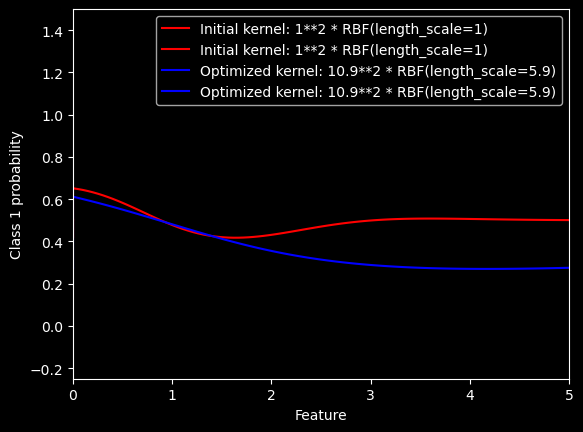

In [209]:
L = np.linspace(0, 5, 100)
L_2D = np.stack([L, np.zeros_like(L)], axis=-1)  # Create a 2D array with two features


plt.plot(
    L_2D,
    gp_fix.predict_proba(L_2D)[:, 1],
    "r",
    label="Initial kernel: %s" % gp_fix.kernel_,
)
plt.plot(
    L_2D,
    gp_opt.predict_proba(L_2D)[:, 1],
    "b",
    label="Optimized kernel: %s" % gp_opt.kernel_,
)
plt.plot()

plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

In [211]:
X,y = load_iris(return_X_y=True)
X = X[:, :2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [213]:
clfs = [
    GaussianProcessClassifier(kernel=1.0 * RBF([1.0])).fit(X_train, y_train),
    GaussianProcessClassifier(kernel=1.0 * RBF([1.0, 1.0])).fit(X_train, y_train)
]

(10000, 3) (10000, 2)
(10000, 3) (10000, 2)


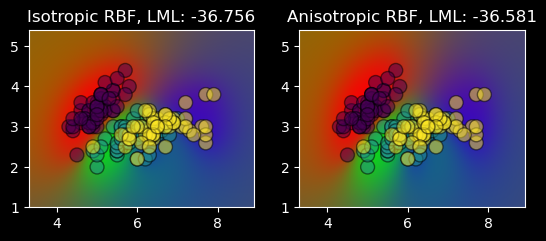

In [253]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))


titles = ["Isotropic RBF", "Anisotropic RBF"]

for i,clf in enumerate(clfs):
    plt.subplot(1, 2, 1+i)
    # Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape, np.c_[xx.ravel(), yy.ravel()].shape)

    # Put the result into a color plot
    Z = Z.reshape(xx.shape[0], xx.shape[1], 3)
    # print(Z.shape)

    # Plot the decision boundary and probability regions
    # plt.contourf(xx, yy, Z, levels=np.linspace(0, 1, 100), cmap='coolwarm', alpha=0.8)
    # plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', marker='o', label="Training data")
    # plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', marker='x', label="Test data")
    plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', marker='o', cmap='viridis', s=100, alpha=0.5)
    
    plt.imshow(Z, extent=(x_min, x_max, y_min, y_max), origin="lower")
    plt.title(
        "%s, LML: %.3f" % (titles[i], clf.log_marginal_likelihood(clf.kernel_.theta))
    )

In [216]:
np.c_[xx.ravel(), yy.ravel()].shape

(10000, 2)

In [219]:
np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)

(array([3.3       , 3.35656566, 3.41313131, 3.46969697, 3.52626263,
        3.58282828, 3.63939394, 3.6959596 , 3.75252525, 3.80909091,
        3.86565657, 3.92222222, 3.97878788, 4.03535354, 4.09191919,
        4.14848485, 4.20505051, 4.26161616, 4.31818182, 4.37474747,
        4.43131313, 4.48787879, 4.54444444, 4.6010101 , 4.65757576,
        4.71414141, 4.77070707, 4.82727273, 4.88383838, 4.94040404,
        4.9969697 , 5.05353535, 5.11010101, 5.16666667, 5.22323232,
        5.27979798, 5.33636364, 5.39292929, 5.44949495, 5.50606061,
        5.56262626, 5.61919192, 5.67575758, 5.73232323, 5.78888889,
        5.84545455, 5.9020202 , 5.95858586, 6.01515152, 6.07171717,
        6.12828283, 6.18484848, 6.24141414, 6.2979798 , 6.35454545,
        6.41111111, 6.46767677, 6.52424242, 6.58080808, 6.63737374,
        6.69393939, 6.75050505, 6.80707071, 6.86363636, 6.92020202,
        6.97676768, 7.03333333, 7.08989899, 7.14646465, 7.2030303 ,
        7.25959596, 7.31616162, 7.37272727, 7.42

In [234]:
X.shape, y.shape

((150, 2), (150,))

In [1]:
from sklearn.utils import all_estimators
all_estimators()

[('ARDRegression', sklearn.linear_model._bayes.ARDRegression),
 ('AdaBoostClassifier', sklearn.ensemble._weight_boosting.AdaBoostClassifier),
 ('AdaBoostRegressor', sklearn.ensemble._weight_boosting.AdaBoostRegressor),
 ('AdditiveChi2Sampler', sklearn.kernel_approximation.AdditiveChi2Sampler),
 ('AffinityPropagation',
  sklearn.cluster._affinity_propagation.AffinityPropagation),
 ('AgglomerativeClustering',
  sklearn.cluster._agglomerative.AgglomerativeClustering),
 ('BaggingClassifier', sklearn.ensemble._bagging.BaggingClassifier),
 ('BaggingRegressor', sklearn.ensemble._bagging.BaggingRegressor),
 ('BayesianGaussianMixture',
  sklearn.mixture._bayesian_mixture.BayesianGaussianMixture),
 ('BayesianRidge', sklearn.linear_model._bayes.BayesianRidge),
 ('BernoulliNB', sklearn.naive_bayes.BernoulliNB),
 ('BernoulliRBM', sklearn.neural_network._rbm.BernoulliRBM),
 ('Binarizer', sklearn.preprocessing._data.Binarizer),
 ('Birch', sklearn.cluster._birch.Birch),
 ('BisectingKMeans', sklearn.cl